In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
## importing libaries
import itertools  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [115]:
# importing data
orig_df = pd.read_excel("Concrete_Data.xls",names=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength'])
df = orig_df.copy()
#Data - first few rows
df.head(10)      

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


#Attribute information

In [116]:
# Let's see the names of the independent columns
for col in df.columns:
    if col!='strength': # Print all column names except target column
        print(col)

cement
slag
ash
water
superplastic
coarseagg
fineagg
age


In [117]:
#Data dimensions
df.shape

(1030, 9)

In [118]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [119]:
# Five pointer summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplastic,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarseagg,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fineagg,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [120]:
# Checking missing value
df.isnull().sum()
# No missing values found

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

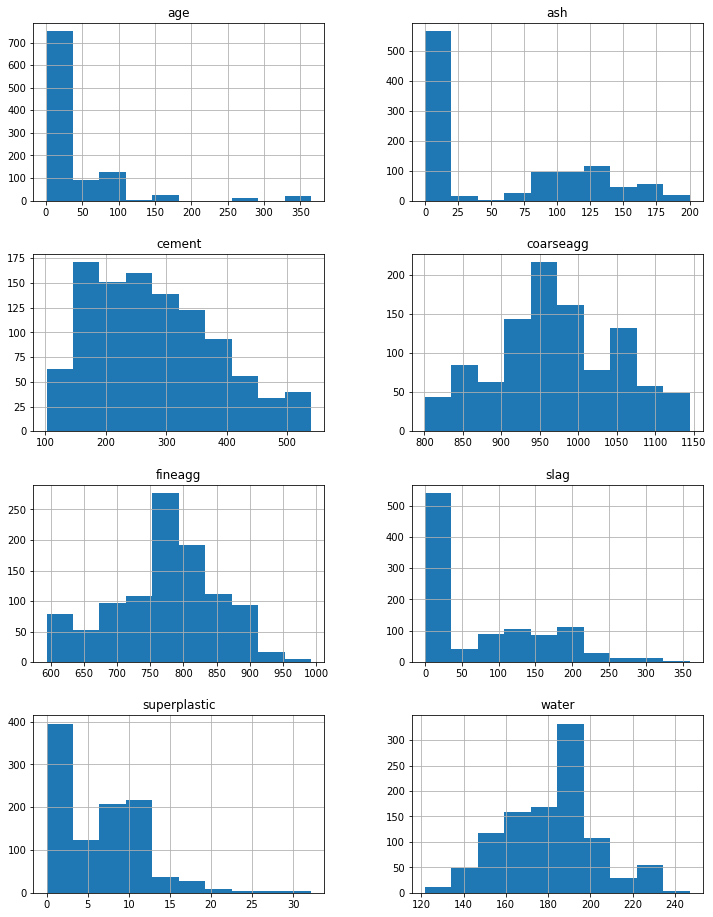

In [53]:
# Let's us only plot the distributions of independent attributes
df.drop('strength',axis=1).hist(figsize=(12,16),layout=(4,2));

In [121]:
# Let's check the skewness values quantitatively
df.skew().sort_values(ascending=False)

age             3.269177
superplastic    0.908113
slag            0.800737
ash             0.537445
cement          0.509517
strength        0.416922
water           0.074324
coarseagg      -0.040206
fineagg        -0.252979
dtype: float64

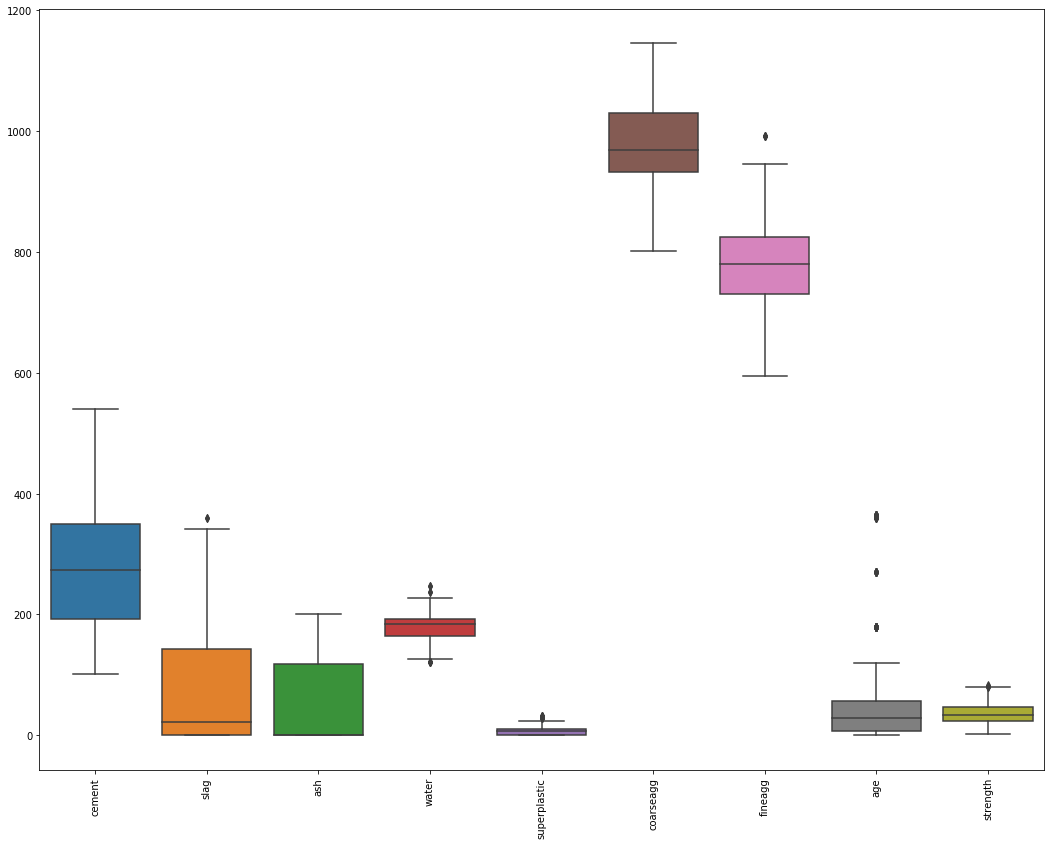

In [55]:
# Let us check presence of outliers
plt.figure(figsize=(18,14))
box = sns.boxplot(data=df)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

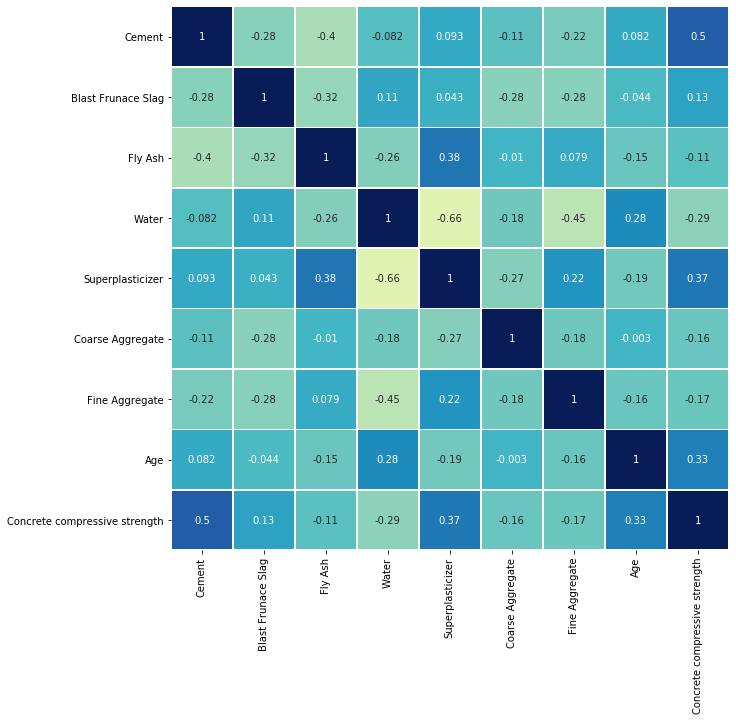

In [20]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

<Figure size 720x720 with 0 Axes>

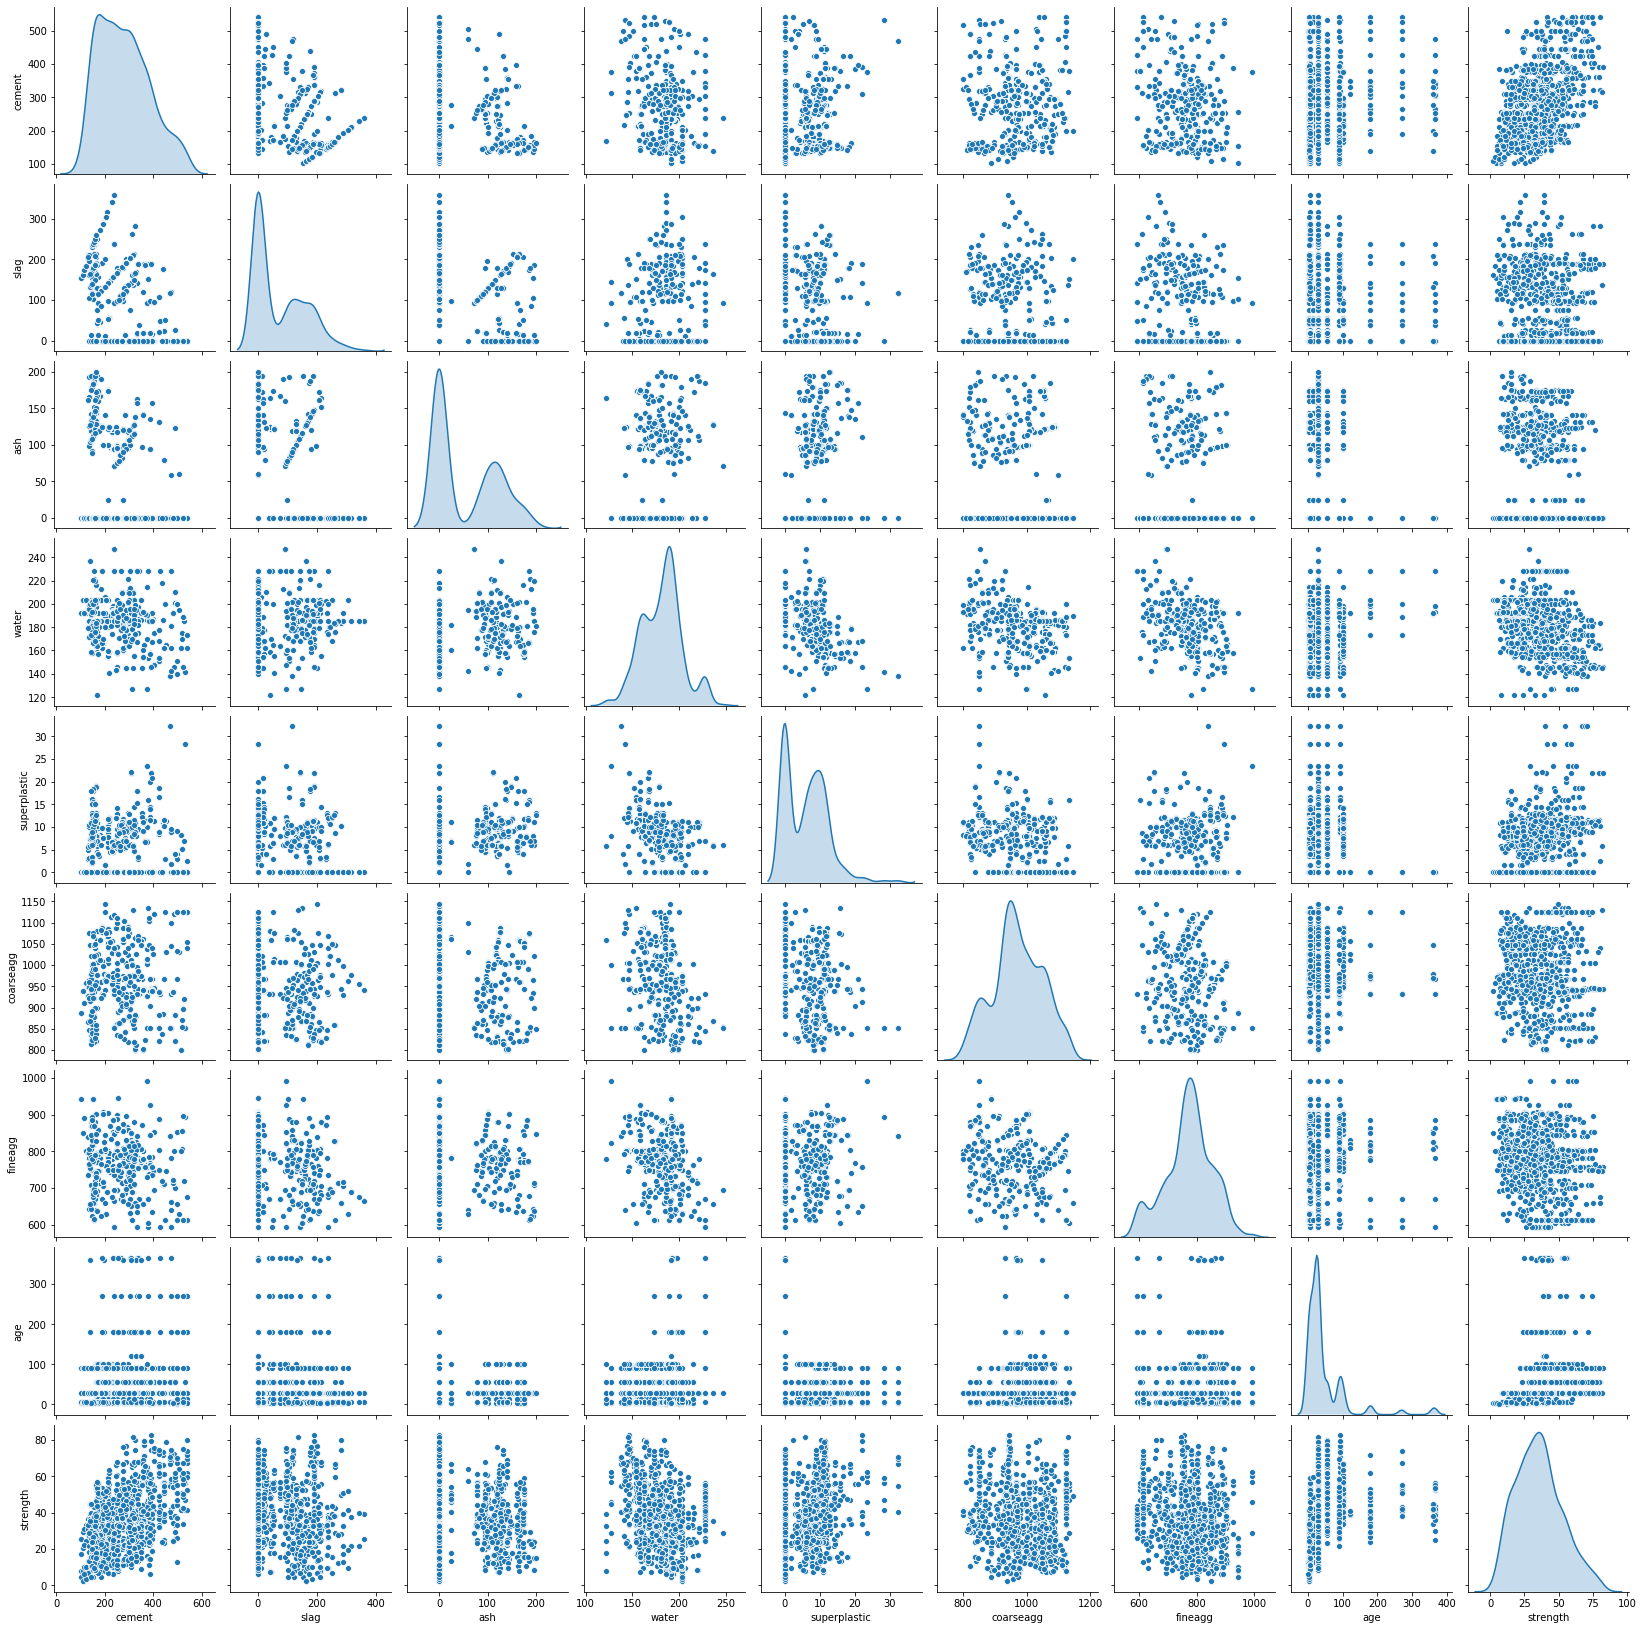

In [56]:
plt.figure(figsize=(10, 10))
sns.pairplot(df,diag_kind='kde');

In [ ]:
By refering to the boxplot shown in the univariate analysis section, one can oberve that

box-plots of attributes namely slag, ash, superplastic, fineagg, age and strength show presence of outliers above third quartile only.
water attribute has presence of outliers both below the first quartile as well as above the third quartile

Strategy to remove outliers: We might choose to replace attribute outlier values by their respective medians.

In [57]:
# let us remove the outliers
for column in df.columns.tolist():
    Q1 = df[column].quantile(.25) # 1st quartile
    Q3 = df[column].quantile(.75) # 3rd quartile
    IQR = Q3-Q1 # get inter quartile range
    # Replace elements of columns that fall below Q1-1.5*IQR and above Q3+1.5*IQR
    df[column].replace(df.loc[(df[column] > Q3+1.5*IQR)|(df[column] < Q1-1.5*IQR), column], df[column].median(),inplace=True)

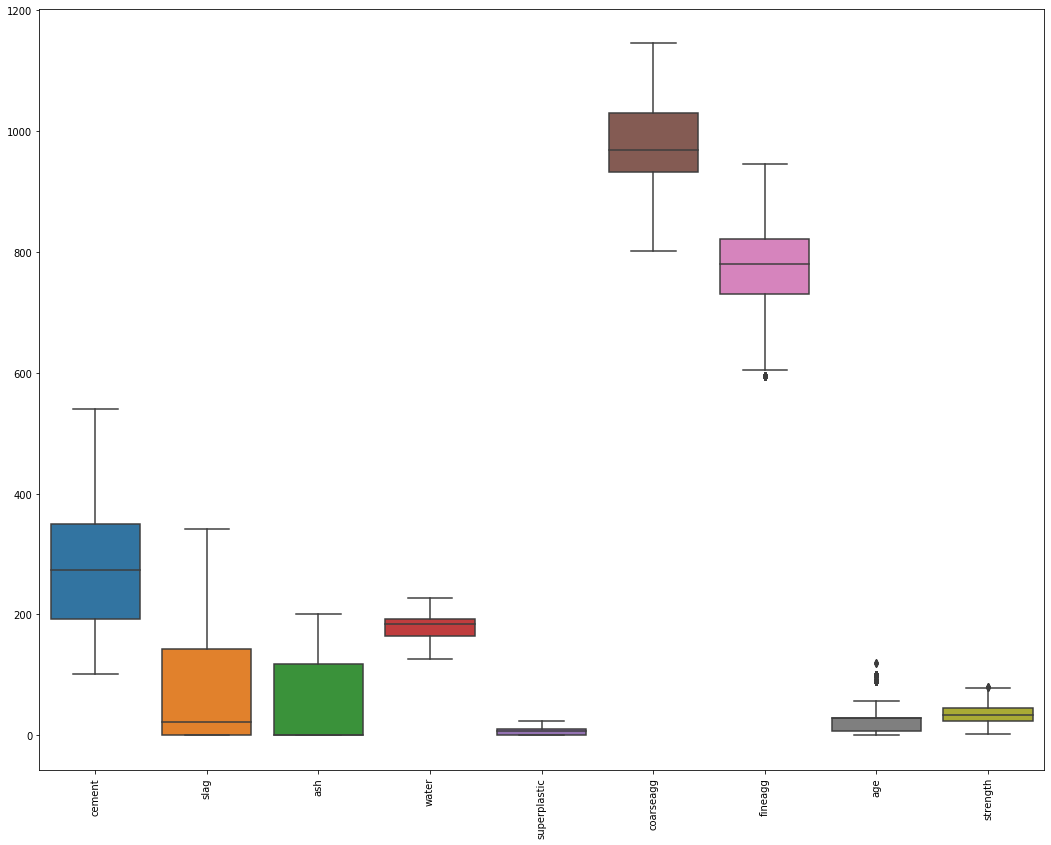

In [58]:
# Let us check presence of outliers
plt.figure(figsize=(18,14))
box = sns.boxplot(data=df)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

In [60]:
# Let's add this new composite feature before target attribute.
df.insert(8,'water/cement',df['water']/df['cement'])
# Let's check whether the feature is added properly or not?
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,34.442774
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,0.685714,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,0.685714,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,0.966767,44.296075


In [67]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,strength
cement,1.000000,-0.275023,-0.397475,-0.091592,0.013565,-0.109356,-0.238701,-0.031968,-0.884602,0.493518
slag,-0.275023,1.000000,-0.320458,0.098911,0.061326,-0.283881,-0.282373,-0.028972,0.356681,0.129556
ash,-0.397475,-0.320458,1.000000,-0.248054,0.447403,-0.009977,0.091696,0.057923,0.253753,-0.097971
water,-0.091592,0.098911,-0.248054,1.000000,-0.657785,-0.156940,-0.426286,-0.040312,0.325201,-0.300036
superplastic,0.013565,0.061326,0.447403,-0.657785,1.000000,-0.224699,0.156270,0.061853,-0.181625,0.342553
coarseagg,-0.109356,-0.283881,-0.009977,-0.156940,-0.224699,1.000000,-0.161403,0.018076,-0.022330,-0.173227
fineagg,-0.238701,-0.282373,0.091696,-0.426286,0.156270,-0.161403,1.000000,0.051527,0.090914,-0.176120
age,-0.031968,-0.028972,0.057923,-0.040312,0.061853,0.018076,0.051527,1.000000,-0.000434,0.499713
water/cement,-0.884602,0.356681,0.253753,0.325201,-0.181625,-0.022330,0.090914,-0.000434,1.000000,-0.501624
strength,0.493518,0.129556,-0.097971,-0.300036,0.342553,-0.173227,-0.176120,0.499713,-0.501624,1.000000


In [123]:
#Splitting the dataset in X & y
X = df.drop(['strength','water/cement'],axis=1)
y = df['strength']
X

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = .2,
                                                    random_state = 1)

In [125]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train),
                              columns = x_train.columns)
x_train_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-0.024580,-0.836936,-0.849283,0.452843,-1.038471,-0.071972,1.010350,-0.274315
1,0.760705,-0.614363,1.345880,-1.313732,0.846464,-0.408315,0.307891,-0.687211
2,-0.064802,1.293906,-0.849283,0.199793,-1.038471,0.502398,-0.799438,-0.274315
3,0.827741,1.353650,-0.849283,0.452843,0.170928,-1.934796,-0.254075,-0.274315
4,-0.641604,-0.836936,0.713642,-1.058295,0.753167,0.391146,1.620722,-0.687211


In [138]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [139]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, x_train_scaled, y_train)

In [140]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,10.278902,0.625221
1,Ridge Regression,10.276950,0.625305
2,Lasso Regression,10.871721,0.580413
3,K Neighbors Regressor,9.184897,0.699144
4,Decision Tree Regressor,7.556426,0.793628
5,Random Forest Regressor,5.362550,0.899592
6,Gradient Boosting Regressor,5.231198,0.902310
7,Adaboost Regressor,7.771859,0.780100


In [143]:
#tuning the tree specific parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [200,400,600],
              'max_depth': range(10,20,5), 
              'min_samples_split': range(100,200,300), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(x_train_scaled, y_train)
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(learning_rate=0.2, max_depth=15,
                          min_samples_split=100, n_estimators=200,
                          random_state=1)
R Squared: 0.936291572818676


In [146]:
#now increasing number of trees and decreasing learning rate proportionally
clf = GradientBoostingRegressor(random_state=1, max_depth=15, 
                                min_samples_split=100, n_estimators=200*2,
                                learning_rate=0.2/2)
print("R Squared:",cross_val_score(clf, x_train_scaled, y_train, cv=cv, scoring='r2').mean())

R Squared: 0.9360525042862005


In [147]:
#applying this model on test data
x_test_scaled = pd.DataFrame(scaler.transform(x_test),
                             columns = x_test.columns)
clf = GradientBoostingRegressor(learning_rate=0.2, max_depth=15,
                                min_samples_split=100, n_estimators=200, 
                                random_state=1).fit(x_train_scaled, y_train)
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clf.predict(x_test_scaled))))
print("Test R^2: ", r2_score(y_test, clf.predict(x_test_scaled)))


Test RMSE:  4.48086061315465
Test R^2:  0.922982742870006
